In [1]:
from SubTempNet import *

%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# SBM

In [15]:
n = [50,50]
p = [[0.001,0],[0,0.00005]]
t = 30000
name = "data/SBM/SBM_ud_n"+str(n[0])+"-"+str(n[1])+"_p"+str(p[0][0])[2:]+"-"+str(p[1][1])[2:]+"_T"+str(t)+".edges"
A = [nx.stochastic_block_model(n,p,seed = None) for i in range(t)]
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(50),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(50),2,replace = False )
    A[-1].add_edge(u,v)
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [17]:
filepath ="data/SBM/SBM_ud_n50-50_p001-00005_T30000.edges"
objname = "SBM_n50-50_p001-00005"
STN= SubTempNet(filepath,objname,directed= False, init = True)

[15000, 12864, 11033, 9463, 8116, 6960, 5970, 5120, 4391, 3766, 3230, 2770, 2376, 2037, 1747, 1499, 1285, 1102, 945, 811, 695, 596, 511, 438, 376, 322, 276, 237, 203, 174, 149, 128, 110, 94, 81, 69, 59, 51, 43, 37, 32, 27, 23, 20, 17, 14, 12, 11, 9, 8]


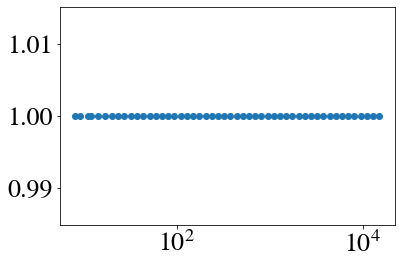

In [19]:
num = 50
T = sorted(list(set(list(np.logspace(np.log10(15000),np.log10(8.1), num, dtype = int)))),reverse = True)
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [ ]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [15000]
Analyzing sample number 4 for samplelength  12864 and  8 slices


In [ ]:
STN.plot_PA(normalize=True)
STN.plot_LCC(normalize=True)
STN.plot_cA0AT()
STN.plot_cA0AL(2,4,6,8)